In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import re
import torch
import torchvision
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes
from PIL import Image

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

import torch
import torchvision

from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SequentialSampler

from matplotlib import pyplot as plt

import os

In [2]:
from google.colab import drive
drive.mount('//drive')

Drive already mounted at //drive; to attempt to forcibly remount, call drive.mount("//drive", force_remount=True).


In [3]:

files_list = sorted(os.listdir("/drive/MyDrive/WCEBleedGen/bleeding/Images"))
print(len(files_list))

1309


In [4]:
print(files_list)

['img- (1).png', 'img- (10).png', 'img- (100).png', 'img- (1000).png', 'img- (1001).png', 'img- (1002).png', 'img- (1003).png', 'img- (1004).png', 'img- (1005).png', 'img- (1006).png', 'img- (1007).png', 'img- (1008).png', 'img- (1009).png', 'img- (101).png', 'img- (1010).png', 'img- (1011).png', 'img- (1012).png', 'img- (1013).png', 'img- (1014).png', 'img- (1015).png', 'img- (1016).png', 'img- (1017).png', 'img- (1018).png', 'img- (1019).png', 'img- (102).png', 'img- (1020).png', 'img- (1021).png', 'img- (1022).png', 'img- (1023).png', 'img- (1024).png', 'img- (1025).png', 'img- (1026).png', 'img- (1027).png', 'img- (1028).png', 'img- (1029).png', 'img- (103).png', 'img- (1030).png', 'img- (1031).png', 'img- (1032).png', 'img- (1033).png', 'img- (1034).png', 'img- (1035).png', 'img- (1036).png', 'img- (1037).png', 'img- (1038).png', 'img- (1039).png', 'img- (104).png', 'img- (1040).png', 'img- (1041).png', 'img- (1042).png', 'img- (1043).png', 'img- (1044).png', 'img- (1045).png', 'i

In [5]:
files_list = sorted(os.listdir("/drive/MyDrive/WCEBleedGen/bleeding/Bounding boxes/TXT"))
print(len(files_list))

1309


In [6]:
labels=[]
files_list = sorted(os.listdir("/drive/MyDrive/WCEBleedGen/bleeding/Images"))
for file_name in files_list:
    path=("/drive/MyDrive/WCEBleedGen/bleeding/Images"+"/"+file_name)
    labels.append(path)


labels = np.array(labels)


In [7]:
im_labels=[]
path="/drive/MyDrive/WCEBleedGen/bleeding/Bounding boxes/TXT"
files_list = sorted(os.listdir("/drive/MyDrive/WCEBleedGen/bleeding/Bounding boxes/TXT"))
bounding_box=[]
for a in files_list:
  f = open(path+"/"+a, "r")

  s=(f.read())
  print(s +"a")
  break

156 101 202 166a


In [8]:
im_labels=[]
path="/drive/MyDrive/WCEBleedGen/bleeding/Bounding boxes/TXT"
files_list = sorted(os.listdir("/drive/MyDrive/WCEBleedGen/bleeding/Bounding boxes/TXT"))
bounding_box=[]
for a in files_list:
  f = open(path+"/"+a, "r")

  s=(f.read())

  l=[]
  r=0
  k=4

  for i in range(len(s)):
    if(i==len(s)-1):
      l.append(int(s[r:i+1]))
      k=k-1


    if s[i]==" ":
      l.append(int(s[r:i]))
      r=i
      k=k-1
    if(k==0 ):

      bounding_box.append(l)

      im_labels.append(a)
      k=4
      l=[]







In [9]:
len(bounding_box)

2477

In [10]:
im_labels[0]

'img- (1).txt'

In [11]:
xmin=[]
xmax=[]
ymin=[]
ymax=[]
for i in bounding_box:
  xmin.append(i[0])
  ymin.append(i[1])
  xmax.append(i[2])
  ymax.append(i[3])

In [12]:
width=np.array(xmax)-np.array(xmin)
length=np.array(ymax)-np.array(ymin)

In [13]:
d={"image_id":im_labels,"bounding box":bounding_box,"xmin":xmin,"ymin":ymin,"width":width,"length":length}

In [14]:
df=pd.DataFrame(d)

In [15]:
df

,image_id,bounding box,xmin,ymin,width,length
0,img- (1).txt,"[156, 101, 202, 166]",156,101,46,65
1,img- (10).txt,"[95, 159, 221, 220]",95,159,126,61
2,img- (100).txt,"[50, 90, 150, 162]",50,90,100,72
3,img- (1000).txt,"[27, 0, 71, 75]",27,0,44,75
4,img- (1000).txt,"[160, 71, 208, 120]",160,71,48,49
...,...,...,...,...,...,...
2472,img- (997).txt,"[98, 2, 150, 66]",98,2,52,64
2473,img- (997).txt,"[116, 92, 131, 114]",116,92,15,22
2474,img- (997).txt,"[28, 154, 46, 193]",28,154,18,39
2475,img- (998).txt,"[53, 30, 119, 133]",53,30,66,103


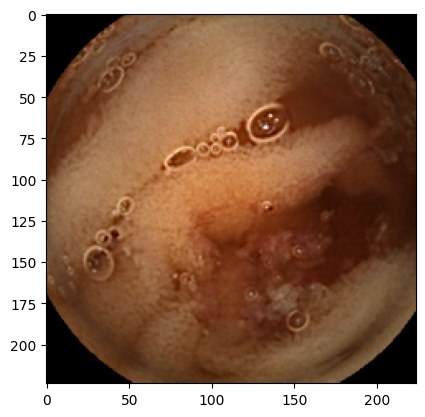

<Figure size 640x480 with 0 Axes>

In [16]:
p=("/drive/MyDrive/WCEBleedGen/bleeding/Images")
image = plt.imread(p+"/"+im_labels[0][0:-3]+"png")
plt.imshow(image)
fig=plt.figure()

In [17]:
im_labels[0]

'img- (1).txt'

In [18]:
bounding_box[0]

[156, 101, 202, 166]

tensor([156, 101, 202, 166], dtype=torch.int32)
torch.Size([4])
torch.Size([1, 4])


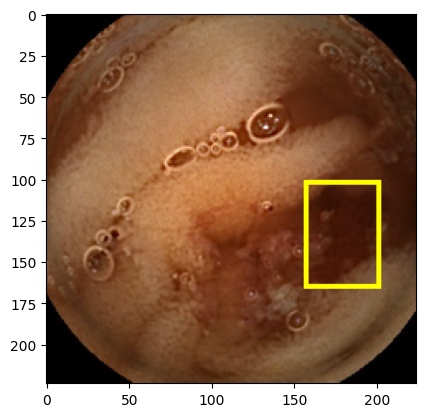

In [19]:


# read input image
img = read_image(p+"/"+im_labels[0][0:-3]+"png")

# bounding box in (xmin, ymin, xmax, ymax) format
# top-left point=(xmin, ymin), bottom-right point = (xmax, ymax)
bbox = bounding_box[0]
bbox = torch.tensor(bbox, dtype=torch.int)
print(bbox)
print(bbox.size())
bbox = bbox.unsqueeze(0)
print(bbox.size())

# draw bounding box on the input image
img=draw_bounding_boxes(img, bbox, width=3, colors=(255,255,0))

# transform it to PIL image and display
img = torchvision.transforms.ToPILImage()(img)
plt.imshow(img)

# BBOX cleaning

In [20]:
wheat_train=df

In [21]:
wheat_train=wheat_train.rename(columns = {'xmin':'x','ymin':'y','width':'w','length':'h'})


In [22]:

wheat_train

,image_id,bounding box,x,y,w,h
0,img- (1).txt,"[156, 101, 202, 166]",156,101,46,65
1,img- (10).txt,"[95, 159, 221, 220]",95,159,126,61
2,img- (100).txt,"[50, 90, 150, 162]",50,90,100,72
3,img- (1000).txt,"[27, 0, 71, 75]",27,0,44,75
4,img- (1000).txt,"[160, 71, 208, 120]",160,71,48,49
...,...,...,...,...,...,...
2472,img- (997).txt,"[98, 2, 150, 66]",98,2,52,64
2473,img- (997).txt,"[116, 92, 131, 114]",116,92,15,22
2474,img- (997).txt,"[28, 154, 46, 193]",28,154,18,39
2475,img- (998).txt,"[53, 30, 119, 133]",53,30,66,103


In [23]:
# import shutil


# image_list = sorted(os.listdir("/drive/MyDrive/WCEBleedGen/bleeding/Images/"))
# testing=image_list[-665:]
# training = image_list[:-665]
# dirs_list = [("/drive/MyDrive/WCEBleedGen/bleeding/Images/", "/drive/MyDrive/WCEBleedGen/bleeding/test/")]

# for img in testing:
#     for source_folder, destination_folder in dirs_list:
#         shutil.copy(source_folder+img, destination_folder+img)

In [24]:
t = sorted(os.listdir("/drive/MyDrive/WCEBleedGen/bleeding/test/"))
len(t)

665

In [25]:
image_ids = wheat_train['image_id'].unique()
valid_ids = image_ids[-665:]
train_ids = image_ids[:-665]

In [26]:
len(valid_ids)

665

In [27]:
valid_df = wheat_train[wheat_train['image_id'].isin(valid_ids)]
train_df = wheat_train[wheat_train['image_id'].isin(train_ids)]

In [28]:
valid_df.shape, train_df.shape

((1094, 6), (1383, 6))

# DATA Retriver

In [29]:
class WheatDataset(Dataset):

    def __init__(self, dataframe, image_dir, transforms=None):
        super().__init__()

        self.image_ids =dataframe['image_id'].unique()
        self.df = dataframe
        self.image_dir = image_dir
        self.transforms = transforms

    def __getitem__(self, index: int):

        image_id = self.image_ids[index]

        records = self.df[self.df['image_id'] == image_id]



        image = cv2.imread(f'{self.image_dir}/{image_id[0:-4]}.png', cv2.IMREAD_COLOR)  #reading an image

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)    #changing color space BGR --> RGB
        image /= 255.0

        boxes = records[['x', 'y', 'w', 'h']].to_numpy()
        area = (boxes[:, 3]) * (boxes[:, 2])  #Calculating area of boxes
        boxes[:, 2] = boxes[:, 0] + boxes[:, 2]  #upper coordinate
        boxes[:, 3] = boxes[:, 1] + boxes[:, 3]  #lower coordinate
        area = torch.as_tensor(area, dtype=torch.float32)

        # there is only one class
        labels = torch.ones((records.shape[0],), dtype=torch.int64)

        # suppose all instances are not crowd
        iscrowd = torch.zeros((records.shape[0],), dtype=torch.int64)

        target = {}
        target['boxes'] = boxes
        target['labels'] = labels
        target['image_id'] = torch.tensor([index])
        target['area'] = area
        target['iscrowd'] = iscrowd

        if self.transforms:
            sample = {
                'image': image,
                'bboxes': target['boxes'],
                'labels': labels
            }
            sample = self.transforms(**sample)
            image = sample['image']

            target['boxes'] =  torch.tensor(sample['bboxes']).float()
            return image, target, image_id

    def __len__(self) -> int:
        return self.image_ids.shape[0]

In [30]:
def get_train_transform():
    return A.Compose(
        [

            A.OneOf([
                A.HueSaturationValue(hue_shift_limit=0.2, sat_shift_limit= 0.2,
                                     val_shift_limit=0.2, p=0.9),
                A.RandomBrightnessContrast(brightness_limit=0.2,
                                           contrast_limit=0.2, p=0.9),
            ],p=0.9),
            A.ToGray(p=0.01),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            A.Resize(height=512, width=512, p=1),
            ToTensorV2(p=1.0),
        ],
        p=1.0,
        bbox_params=A.BboxParams(
            format='pascal_voc',
            min_area=0,
            min_visibility=0,
            label_fields=['labels']
        )
    )


def get_valid_transform():
    return A.Compose(
        [
            A.Resize(height=512, width=512, p=1.0),
            ToTensorV2(p=1.0),
        ],
        p=1.0,
        bbox_params=A.BboxParams(
            format='pascal_voc',
            min_area=0,
            min_visibility=0,
            label_fields=['labels']
        )
    )

# TrainLoader

In [31]:
def collate_fn(batch):
    return tuple(zip(*batch))

DIR_INPUT = '/drive/MyDrive/WCEBleedGen/bleeding'
DIR_TRAIN =f'{DIR_INPUT}/train'
DIR_TEST = f'{DIR_INPUT}/test'

train_dataset = WheatDataset(train_df, DIR_TRAIN, get_train_transform())
valid_dataset = WheatDataset(valid_df, DIR_TEST, get_valid_transform())

# split the dataset in train and test set
indices = torch.randperm(len(train_dataset)).tolist()

train_data_loader = DataLoader(
    train_dataset,
    batch_size= 16,
    shuffle=False,
    num_workers=4,
    collate_fn=collate_fn
)

valid_data_loader = DataLoader(
    valid_dataset,
    batch_size=16,
    shuffle=False,
    num_workers=4,
    collate_fn=collate_fn
)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [32]:
valid_df

,image_id,bounding box,x,y,w,h
1383,img- (40).txt,"[110, 0, 163, 38]",110,0,53,38
1384,img- (40).txt,"[12, 56, 69, 127]",12,56,57,71
1385,img- (400).txt,"[11, 65, 221, 217]",11,65,210,152
1386,img- (401).txt,"[0, 0, 224, 224]",0,0,224,224
1387,img- (401).txt,"[6, 31, 14, 37]",6,31,8,6
...,...,...,...,...,...,...
2472,img- (997).txt,"[98, 2, 150, 66]",98,2,52,64
2473,img- (997).txt,"[116, 92, 131, 114]",116,92,15,22
2474,img- (997).txt,"[28, 154, 46, 193]",28,154,18,39
2475,img- (998).txt,"[53, 30, 119, 133]",53,30,66,103


# SAMPLE

In [33]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [34]:
images, targets, image_ids= next(iter(valid_data_loader))



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [35]:
images = list(image.to(device) for image in images)
targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

In [36]:
boxes = targets[1]['boxes'].cpu().numpy().astype(np.int32)
print(boxes.shape)
sample = images[1].permute(1,2,0).cpu().numpy()

(1, 4)


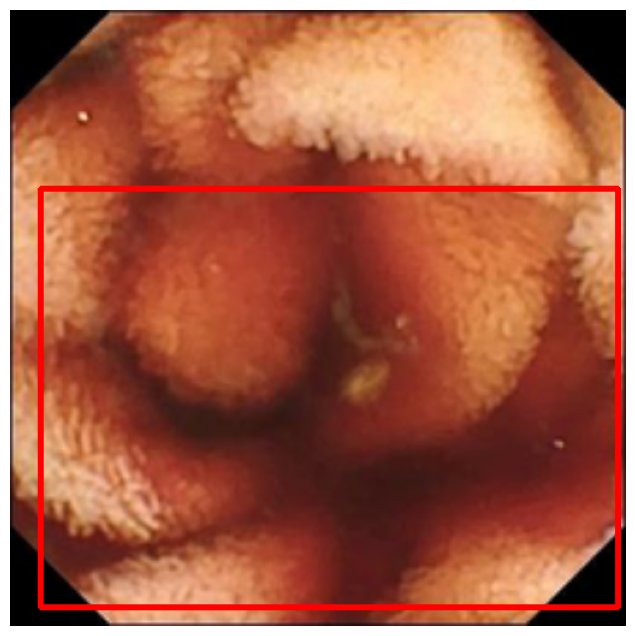

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

for box in boxes:
    cv2.rectangle(sample,
                  (box[0], box[1]),
                  (box[2], box[3]),
                  (220, 0, 0), 3)

ax.set_axis_off()
ax.imshow(sample)

# FASTER RCNN

In [38]:
# load a model; pre-trained on COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [39]:
num_classes = 2  # 1 class (wheat) + background

# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# PRE Calculation

In [40]:
class Averager:
    def __init__(self):
        self.current_total = 0.0
        self.iterations = 0.0

    def send(self, value):
        self.current_total += value
        self.iterations += 1

    @property
    def value(self):
        if self.iterations == 0:
            return 0
        else:
            return 1.0 * self.current_total / self.iterations

    def reset(self):
        self.current_total = 0.0
        self.iterations = 0.0

In [41]:
def calculate_iou(gt, pr, form='pascal_voc') -> float:
    """Calculates the Intersection over Union.

    Args:
        gt: (np.ndarray[Union[int, float]]) coordinates of the ground-truth box
        pr: (np.ndarray[Union[int, float]]) coordinates of the prdected box
        form: (str) gt/pred coordinates format
            - pascal_voc: [xmin, ymin, xmax, ymax]
            - coco: [xmin, ymin, w, h]
    Returns:
        (float) Intersection over union (0.0 <= iou <= 1.0)
    """
    if form == 'coco':
        gt = gt.copy()
        pr = pr.copy()

        gt[2] = gt[0] + gt[2]
        gt[3] = gt[1] + gt[3]
        pr[2] = pr[0] + pr[2]
        pr[3] = pr[1] + pr[3]

    # Calculate overlap area
    dx = min(gt[2], pr[2]) - max(gt[0], pr[0]) + 1

    if dx < 0:
        return 0.0
    dy = min(gt[3], pr[3]) - max(gt[1], pr[1]) + 1

    if dy < 0:
        return 0.0

    overlap_area = dx * dy

    # Calculate union area
    union_area = (
            (gt[2] - gt[0] + 1) * (gt[3] - gt[1] + 1) +
            (pr[2] - pr[0] + 1) * (pr[3] - pr[1] + 1) -
            overlap_area
    )

    return overlap_area / union_area

In [42]:
def find_best_match(gts, pred, pred_idx, threshold = 0.5, form = 'pascal_voc', ious=None) -> int:
    """Returns the index of the 'best match' between the
    ground-truth boxes and the prediction. The 'best match'
    is the highest IoU. (0.0 IoUs are ignored).

    Args:
        gts: (List[List[Union[int, float]]]) Coordinates of the available ground-truth boxes
        pred: (List[Union[int, float]]) Coordinates of the predicted box
        pred_idx: (int) Index of the current predicted box
        threshold: (float) Threshold
        form: (str) Format of the coordinates
        ious: (np.ndarray) len(gts) x len(preds) matrix for storing calculated ious.

    Return:
        (int) Index of the best match GT box (-1 if no match above threshold)
    """
    best_match_iou = -np.inf
    best_match_idx = -1
    for gt_idx in range(len(gts)):

        if gts[gt_idx][0] < 0:
            # Already matched GT-box
            continue

        iou = -1 if ious is None else ious[gt_idx][pred_idx]

        if iou < 0:
            iou = calculate_iou(gts[gt_idx], pred, form=form)

            if ious is not None:
                ious[gt_idx][pred_idx] = iou

        if iou < threshold:
            continue

        if iou > best_match_iou:
            best_match_iou = iou
            best_match_idx = gt_idx

    return best_match_idx

In [43]:
def calculate_precision(gts, preds, threshold = 0.5, form = 'coco', ious=None) -> float:
    """Calculates precision for GT - prediction pairs at one threshold.

    Args:
        gts: (List[List[Union[int, float]]]) Coordinates of the available ground-truth boxes
        preds: (List[List[Union[int, float]]]) Coordinates of the predicted boxes,
               sorted by confidence value (descending)
        threshold: (float) Threshold
        form: (str) Format of the coordinates
        ious: (np.ndarray) len(gts) x len(preds) matrix for storing calculated ious.

    Return:
        (float) Precision
    """
    n = len(preds)
    tp = 0
    fp = 0

    for pred_idx in range(n):

        best_match_gt_idx = find_best_match(gts, preds[pred_idx], pred_idx,
                                            threshold=threshold, form=form, ious=ious)

        if best_match_gt_idx >= 0:
            # True positive: The predicted box matches a gt box with an IoU above the threshold.
            tp += 1
            # Remove the matched GT box
            gts[best_match_gt_idx] = -1
        else:
            # No match
            # False positive: indicates a predicted box had no associated gt box.
            fp += 1

    # False negative: indicates a gt box had no associated predicted box.
    fn = (gts.sum(axis=1) > 0).sum()

    return tp / (tp + fp + fn)

In [44]:
def calculate_image_precision(gts, preds, thresholds = (0.5, ), form = 'coco') -> float:
    """Calculates image precision.

    Args:
        gts: (List[List[Union[int, float]]]) Coordinates of the available ground-truth boxes
        preds: (List[List[Union[int, float]]]) Coordinates of the predicted boxes,
               sorted by confidence value (descending)
        thresholds: (float) Different thresholds
        form: (str) Format of the coordinates

    Return:
        (float) Precision
    """
    n_threshold = len(thresholds)
    image_precision = 0.0

    ious = np.ones((len(gts), len(preds))) * -1
    # ious = None

    for threshold in thresholds:
        precision_at_threshold = calculate_precision(gts.copy(), preds, threshold=threshold,
                                                     form=form, ious=ious)
        image_precision += precision_at_threshold / n_threshold

    return image_precision

# Model Train AND VALIDATION

In [45]:

#Hyperparameters
#model.load_state_dict(torch.load('../input/weights/fasterrcnn_resnet50_fpn.pth',map_location=torch.device('cpu')))
model.to(device)
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.001, momentum=0.9, weight_decay=0.0005)
num_epochs = 1


In [46]:
train_hist = Averager()
t = 1
valid_pred_min = 0.65
for epoch in range(num_epochs):
    train_hist.reset()

    model.train()
    for images, targets, image_ids in train_data_loader:

        images = list(image.to(device) for image in images)[:600]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets][:600]

        loss_dict = model(images, targets)

        losses = sum(loss for loss in loss_dict.values())
        train_loss = losses.item()

        train_hist.send(train_loss)

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        if t % 50 == 0:
            print(f"Iteration #{t} loss: {train_loss}")

        t += 1


    model.eval()
    validation_image_precisions = []
    iou_thresholds = [x for x in np.arange(0.5, 0.76, 0.05)]
    for images, targets, image_ids in valid_data_loader:
        images = list(image.to(device) for image in images)[:600]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets][:600]

        with torch.no_grad():
            outputs = model(images)




        for i, image in enumerate(images):
            boxes = outputs[i]['boxes'].data.cpu().numpy()
            scores = outputs[i]['scores'].data.cpu().numpy()
            gt_boxes = targets[i]['boxes'].cpu().numpy()
            preds_sorted_idx = np.argsort(scores)[::-1]
            preds_sorted = boxes[preds_sorted_idx]
            image_precision = calculate_image_precision(preds_sorted,
                                                        gt_boxes,
                                                        thresholds=iou_thresholds,
                                                        form='coco')
            validation_image_precisions.append(image_precision)

    valid_prec = np.mean(validation_image_precisions)
    print("Validation IOU: {0:.4f}".format(valid_prec))



    #print training/validation statistics
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch,
        train_loss
    ))

    ## TODO: save the model if validation precision has decreased
    if valid_prec >= valid_pred_min:
        print('Validation precision increased({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_pred_min,
            valid_prec))
        torch.save(model.state_dict(), 'fasterrcnn_resnet50_fpn.pth')
        valid_pred_min = valid_prec



Validation IOU: 0.0198
Epoch: 0 	Training Loss: 0.243438


# Evaluating Model

In [47]:
model.eval()
images, targets, image_ids = next(iter(valid_data_loader))
images = list(image.to(device) for image in images)
outputs = model(images)


In [48]:
detection_threshold = 0.5
sample = images[1].permute(1,2,0).cpu().numpy()
boxes = outputs[1]['boxes'].data.cpu().numpy()
scores = outputs[1]['scores'].data.cpu().numpy()

boxes = boxes[scores >= detection_threshold].astype(np.int32)

In [50]:
scores

array([0.38175604, 0.35171998, 0.30457684, 0.2929706 , 0.26071203,
       0.2599131 , 0.24325602, 0.2424187 , 0.23766372, 0.2362379 ,
       0.21816641, 0.21761265, 0.20670363, 0.2022133 , 0.18820857,
       0.17726628, 0.17708384, 0.17233014, 0.17001711, 0.16904713,
       0.16389711, 0.16217004, 0.16192527, 0.15869257, 0.15393269,
       0.14893086, 0.14781709, 0.14503448, 0.14477378, 0.13766102,
       0.13403764, 0.13323665, 0.13282728, 0.13144284, 0.1255671 ,
       0.12181482, 0.11777753, 0.11761075, 0.11531547, 0.11500593,
       0.11350746, 0.11348844, 0.11323109, 0.1107799 , 0.10170303,
       0.10008478, 0.09877475, 0.09812459, 0.09355945, 0.09305191,
       0.09283044, 0.09111702, 0.09072962, 0.08873308, 0.08602326,
       0.08542702, 0.08254089, 0.07353722, 0.07287394, 0.07004298,
       0.06979132, 0.06672759, 0.06467964, 0.05974665], dtype=float32)

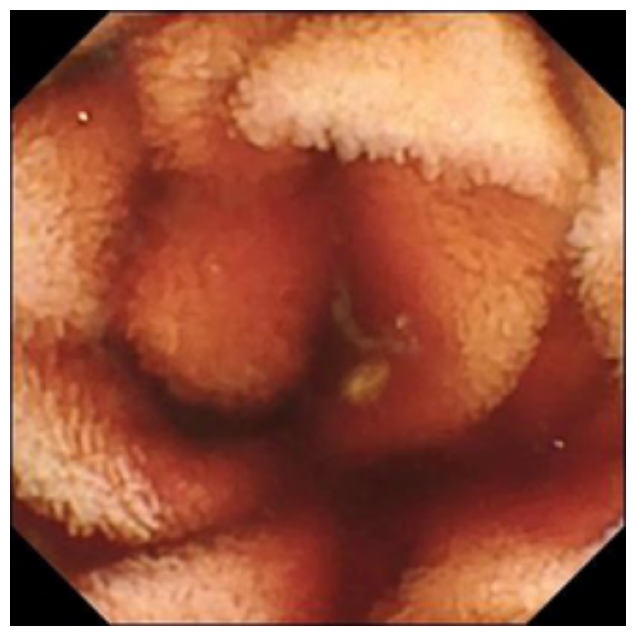

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

for box in boxes:
    cv2.rectangle(sample,
                  (box[0], box[1]),
                  (box[2], box[3]),
                  (220, 0, 0), 2)

ax.set_axis_off()
ax.imshow(sample)